# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** Anthony  
**Dataset:** Air Quality  
**Date:** Oct 8th

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [40]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")



In [41]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',', na_values=['NaN'])

data = {
    'CO(GT)': pd.to_numeric(df['CO(GT)'], errors='coerce'),
    'PT08.S1(CO)': pd.to_numeric(df['PT08.S1(CO)'], errors='coerce'),
    'NMHC(GT)': pd.to_numeric(df['NMHC(GT)'], errors='coerce'),
    'C6H6(GT)': pd.to_numeric(df['C6H6(GT)'], errors='coerce'),
    'target': (pd.to_numeric(df['CO(GT)'], errors='coerce') > 2).astype(int)  # Example target: high CO level
}

df = pd.DataFrame(data)
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (9471, 5)


CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  target
0     2.6       1360.0     150.0      11.9       1
1     2.0       1292.0     112.0       9.4       0
2     2.2       1402.0      88.0       9.0       1
3     2.2       1376.0      80.0       9.2       1
4     1.6       1272.0      51.0       6.5       0

## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [42]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


=== DATASET OVERVIEW ===
Shape: (9471, 5)

Data types:
CO(GT)         float64
PT08.S1(CO)    float64
NMHC(GT)       float64
C6H6(GT)       float64
target           int64
dtype: object

Missing values:
CO(GT)         114
PT08.S1(CO)    114
NMHC(GT)       114
C6H6(GT)       114
target           0
dtype: int64

Basic statistics:


CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)       target
count  9357.000000  9357.000000  9357.000000  9357.000000  9471.000000
mean    -34.207524  1048.990061  -159.090093     1.865683     0.351388
std      77.657170   329.832710   139.789093    41.380206     0.477429
min    -200.000000  -200.000000  -200.000000  -200.000000     0.000000
25%       0.600000   921.000000  -200.000000     4.000000     0.000000
50%       1.500000  1053.000000  -200.000000     7.900000     0.000000
75%       2.600000  1221.000000  -200.000000    13.600000     1.000000
max      11.900000  2040.000000  1189.000000    63.700000     1.000000

=== CO(GT)/Target VARIABLE ===
CO(GT) distribution:
target
0    6143
1    3328
Name: count, dtype: int64


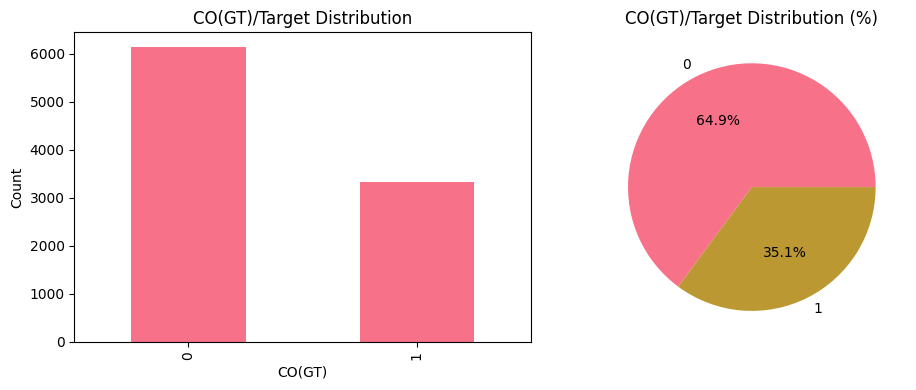

O is low, 1 is high


In [43]:
# Target variable analysis
print("=== CO(GT)/Target VARIABLE ===")
COGT_counts = df['target'].value_counts()
print(f"CO(GT) distribution:")
print(COGT_counts)

# Visualize CO(GT) distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
COGT_counts.plot(kind='bar')

plt.title('CO(GT)/Target Distribution')
plt.xlabel('CO(GT)')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(COGT_counts.values, labels=COGT_counts.index, autopct='%1.1f%%')
plt.title('CO(GT)/Target Distribution (%)')


plt.tight_layout()
plt.show()
print('O is low, 1 is high')

=== NUMERICAL VARIABLES ===
Numerical columns: ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'target']


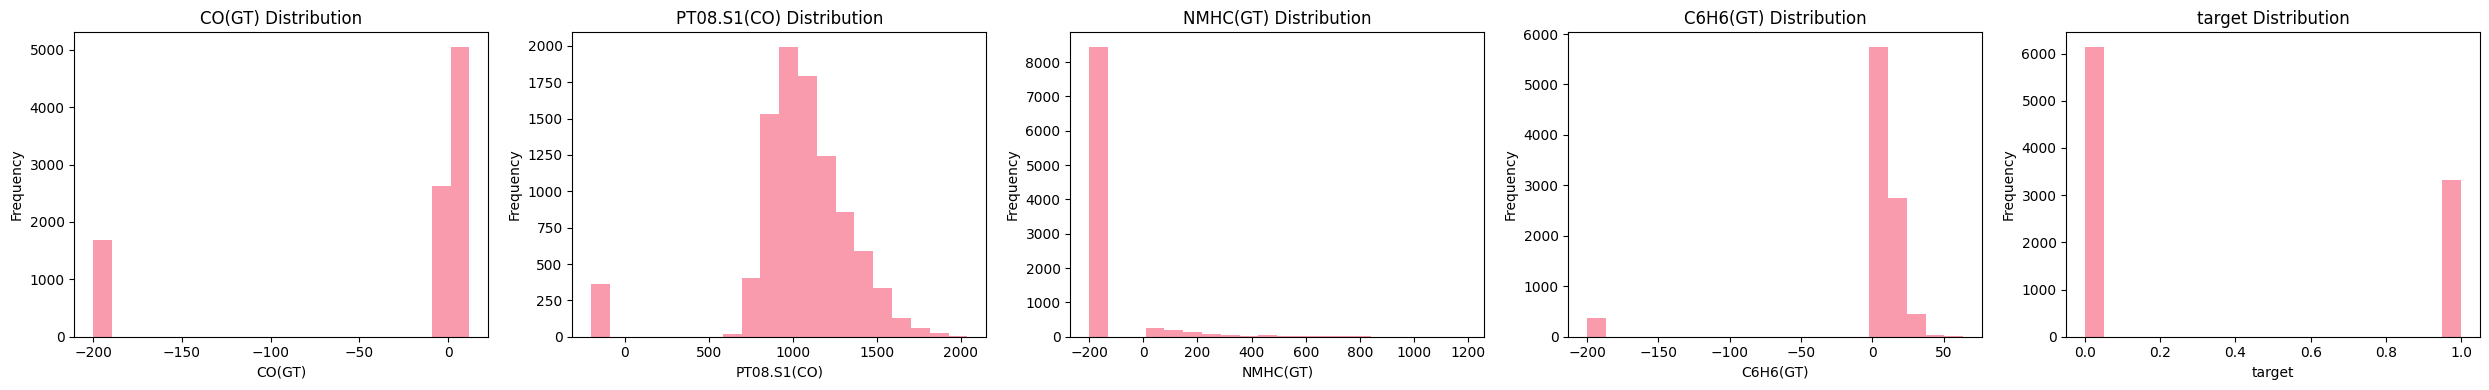

In [44]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

# Create histograms for numerical variables
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [45]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    
    # Create bar plot
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


=== CATEGORICAL VARIABLES ===
Categorical columns: []


=== CORRELATION ANALYSIS ===


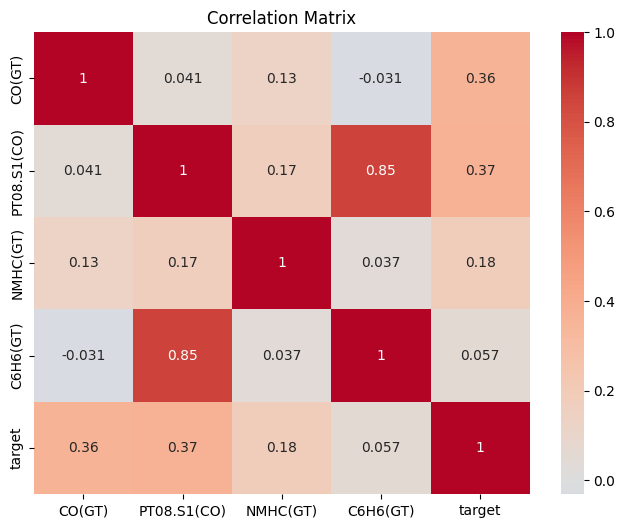


Correlations with target variable:
target         1.000000
PT08.S1(CO)    0.368458
CO(GT)         0.360181
NMHC(GT)       0.175138
C6H6(GT)       0.056902
Name: target, dtype: float64


In [46]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Show correlations with target variable
if 'target' in df.columns:
    target_correlations = correlation_matrix['target'].sort_values(ascending=False)
    print("\nCorrelations with target variable:")
    print(target_correlations)


=== RELATIONSHIPS WITH TARGET ===


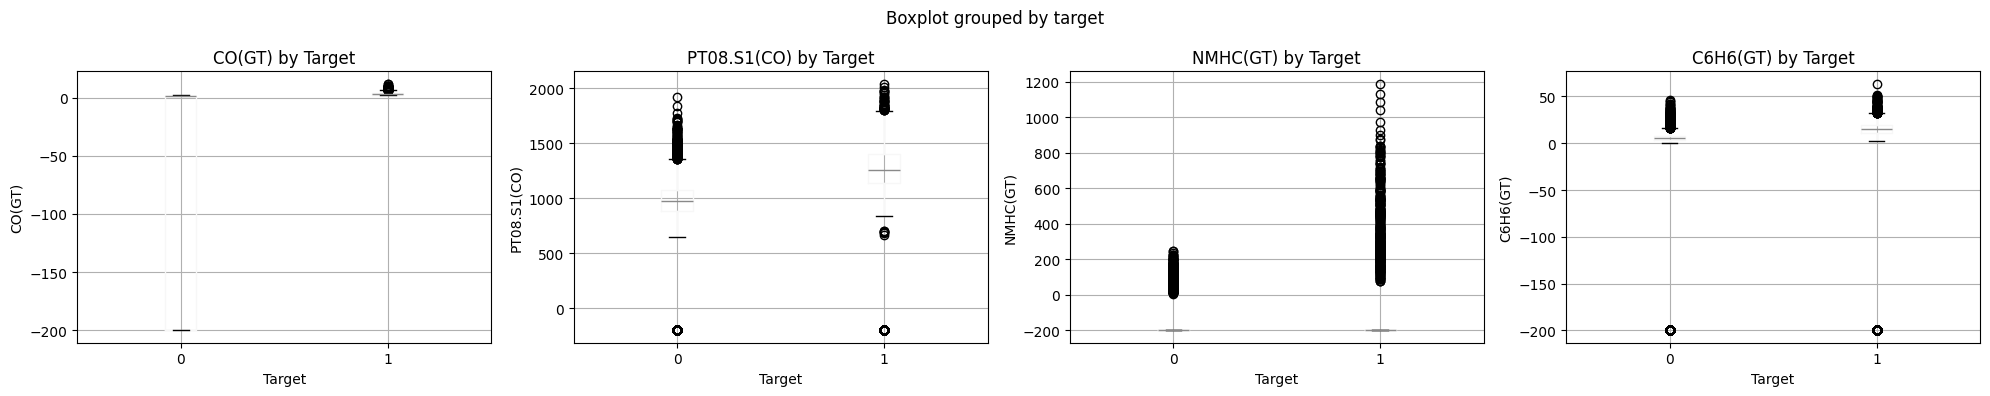

In [47]:
# Relationship between variables and target
print("=== RELATIONSHIPS WITH TARGET ===")

# Box plots for numerical variables vs target
numerical_cols_no_target = [col for col in numerical_cols if col != 'target']

if len(numerical_cols_no_target) > 0:
    fig, axes = plt.subplots(1, len(numerical_cols_no_target), figsize=(5*len(numerical_cols_no_target), 4))
    if len(numerical_cols_no_target) == 1:
        axes = [axes]
    
    for i, col in enumerate(numerical_cols_no_target):
        df.boxplot(column=col, by='target', ax=axes[i])
        axes[i].set_title(f'{col} by Target')
        axes[i].set_xlabel('Target')
        axes[i].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()

# Crosstabs for categorical variables vs target
for col in categorical_cols:
    print(f"\n{col} vs Target:")
    crosstab = pd.crosstab(df[col], df['target'], normalize='index')
    print(crosstab.round(3))


## Exploratory Data Analysis (EDA) Explained

### 1. Dataset Overview
- **Shape:** The dataset contains 9471 rows (hourly measurements) and 5 columns: CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), and target.
- **Variables:**
    - **CO(GT):** Measured carbon monoxide concentration.
    - **PT08.S1(CO):** Sensor reading for CO.
    - **NMHC(GT):** Measured non-methane hydrocarbons.
    - **C6H6(GT):** Measured benzene concentration.
    - **target:** Binary indicator (0 = low CO, 1 = high CO).

### 2. Data Types & Missing Values
- Most columns are numeric (float64), except for the target (int64).
- Missing values are present in the pollutant columns, but not in the target.

### 3. Target Variable Analysis
- **Distribution:** Majority of hours have low CO (target=0: 6143), fewer have high CO (target=1: 3328).
- **Visualization:** Bar and pie charts show the proportion of low vs high CO hours.

### 4. Numerical Variables Analysis
- **Histograms:** Each pollutant and sensor variable is plotted to show its distribution.
- **Findings:** Most variables are skewed, with many low values and fewer high values.

### 5. Correlation Analysis
- **Heatmap:** Shows how variables relate to each other.
- **Key Results:**
    - PT08.S1(CO) and C6H6(GT) are strongly correlated (0.85).
    - CO(GT) and target are moderately correlated (0.36).
    - Other correlations are weaker.

### 6. Relationships with Target
- **Boxplots:** Show how each numerical variable differs between low and high CO hours.
- **Findings:** Benzene (C6H6(GT)) tends to be higher during high CO hours.
- **Crosstabs:** Not applicable (no categorical variables).

---

### What Does This Mean?
- **Patterns:** High CO hours are less frequent but associated with higher benzene levels.
- **Sensor Reliability:** The sensor PT08.S1(CO) tracks benzene well and is moderately correlated with CO.
- **Variable Relationships:** Some pollutants and sensor readings move together, suggesting shared sources or environmental factors.
- **Data Quality:** Missing values are present but do not affect the target variable.

**In summary:**  
EDA helps you understand the structure, distribution, and relationships in your data. It reveals which variables are important, how they interact, and guides hypothesis formulation for further statistical testing.

## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1: Benzene concentration differs between low and high CO hours
**H1:** The mean benzene concentration (`C6H6(GT)`) is different during hours with low CO (`target=0`) versus high CO (`target=1`).
- **Null Hypothesis (H0):** The mean benzene concentration is the same for low and high CO hours.
- **Alternative Hypothesis (H1):** The mean benzene concentration is different for low and high CO hours.
- **Rationale:** Boxplots and summary statistics suggest benzene levels may vary with CO, indicating a possible relationship.

### Hypothesis 2: Sensor readings are correlated with measured CO
**H2:** The electrochemical sensor (`PT08.S1(CO)`) readings are correlated with measured CO (`CO(GT)`).
- **Null Hypothesis (H0):** There is no correlation between sensor readings and measured CO.
- **Alternative Hypothesis (H1):** There is a significant correlation between sensor readings and measured CO.
- **Rationale:** Correlation analysis and scatter plots show a visible association, suggesting the sensor tracks CO levels.

### Hypothesis 3: CO and benzene are linearly correlated
**H3:** Measured CO (`CO(GT)`) and benzene (`C6H6(GT)`) concentrations are linearly correlated.
- **Null Hypothesis (H0):** There is no linear correlation between CO and benzene concentrations.
- **Alternative Hypothesis (H1):** There is a significant linear correlation between CO and benzene concentrations.
- **Rationale:** Both pollutants are related to air quality and may originate from similar sources, so a linear relationship is plausible.

---


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: Benzene concentration differs between low and high CO hours

**Test Choice:** Mann-Whitney U test (non-parametric)

- **Why appropriate:** The Mann-Whitney U test is suitable for comparing the distributions of benzene concentration (`C6H6(GT)`) between two independent groups (low CO: `target=0`, high CO: `target=1`). Normality tests (Shapiro) were inconclusive or not applicable due to large sample size, so a non-parametric test is preferred. This test does not assume normality and is robust for skewed or non-normal data.


In [48]:
# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1 ===")
# H1: Mean benzene concentration (C6H6(GT)) differs between low-CO and high-CO hours (target=0 vs 1).
# We'll check normality; if non-normal, use Mann-Whitney U test, otherwise t-test.
benzene = df['C6H6(GT)'].dropna()
group0 = df[df['target'] == 0]['C6H6(GT)'].dropna()
group1 = df[df['target'] == 1]['C6H6(GT)'].dropna()
print(f"Group sizes: target=0 -> {len(group0)}, target=1 -> {len(group1)}")
# Normality test (Shapiro) — use on reasonably sized samples (if sample > 500, skip Shapiro)
if len(group0) >= 3 and len(group0) <= 500:
    stat0, p0 = stats.shapiro(group0)
else:
    stat0, p0 = (None, None)
if len(group1) >= 3 and len(group1) <= 500:
    stat1, p1 = stats.shapiro(group1)
else:
    stat1, p1 = (None, None)
print(f"Shapiro p-values: group0={p0}, group1={p1}")
# Decide test
use_mannwhitney = True
if p0 is not None and p1 is not None and p0 > 0.05 and p1 > 0.05:
    use_mannwhitney = False
if use_mannwhitney:
    u_stat, p_val = stats.mannwhitneyu(group0, group1, alternative='two-sided')
    print(f"Mann-Whitney U statistic: {u_stat:.4f}, p-value: {p_val:.4f}")
    if p_val < 0.05:
        print("Result: Reject H0 — benzene distributions differ between CO groups (p<0.05)")
    else:
        print("Result: Fail to reject H0 — no evidence benzene differs by CO group")
else:
    t_stat, p_val = stats.ttest_ind(group0, group1, nan_policy='omit', equal_var=False)
    print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")
    if p_val < 0.05:
        print("Result: Reject H0 — benzene means differ between CO groups (p<0.05)")
    else:
        print("Result: Fail to reject H0 — no evidence benzene means differ by CO group")


=== TESTING HYPOTHESIS 1 ===
Group sizes: target=0 -> 6029, target=1 -> 3328
Shapiro p-values: group0=None, group1=None
Mann-Whitney U statistic: 2526424.0000, p-value: 0.0000
Result: Reject H0 — benzene distributions differ between CO groups (p<0.05)


### Testing Hypothesis 2: Sensor readings are correlated with measured CO

**Test Choice:** Spearman rank correlation

- **Why appropriate:** The Spearman rank correlation test is suitable for assessing the monotonic relationship between the electrochemical sensor readings (`PT08.S1(CO)`) and measured CO (`CO(GT)`). This test does not assume linearity or normality, making it robust for environmental sensor data, which may not be normally distributed or linearly related. The exploratory analysis indicated a visible association, and Spearman's method quantifies the strength and significance of this monotonic correlation.


=== TESTING HYPOTHESIS 2 ===
Spearman rho: 0.5843, p-value: 0.0000
Result: Reject H0 — significant monotonic correlation between sensor and CO (p<0.05)


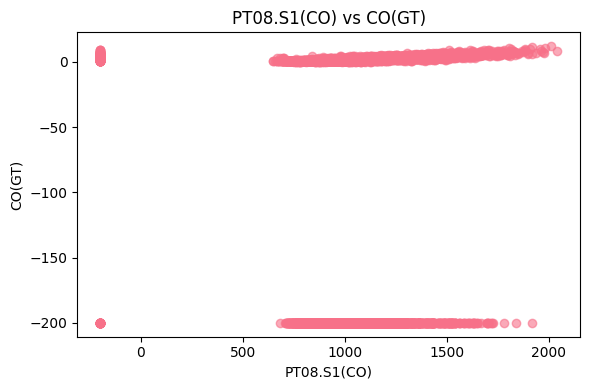

In [49]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")
# H2: The electrochemical sensor PT08.S1(CO) readings are correlated with measured CO(GT) values.
# Sensor readings may not be linear — use Spearman rank correlation which is robust to monotonic relationships.
mask = df[['PT08.S1(CO)', 'CO(GT)']].dropna()
if len(mask) < 10:
    print("Not enough paired observations to test correlation.")
else:
    rho, p_corr = stats.spearmanr(mask['PT08.S1(CO)'], mask['CO(GT)'])
    print(f"Spearman rho: {rho:.4f}, p-value: {p_corr:.4f}")
    if p_corr < 0.05:
        print("Result: Reject H0 — significant monotonic correlation between sensor and CO (p<0.05)")
    else:
        print("Result: Fail to reject H0 — no evidence of monotonic correlation")
    # Scatter plot with a lowess/smooth line
    plt.figure(figsize=(6, 4))
    plt.scatter(mask['PT08.S1(CO)'], mask['CO(GT)'], alpha=0.6)
    plt.title('PT08.S1(CO) vs CO(GT)')
    plt.xlabel('PT08.S1(CO)')
    plt.ylabel('CO(GT)')
    plt.tight_layout()
    plt.show()


### Testing Hypothesis 3: CO and benzene are linearly correlated

**Test Choice:** Pearson correlation

- **Why appropriate:** The Pearson correlation test is suitable for evaluating the linear relationship between measured CO (`CO(GT)`) and benzene (`C6H6(GT)`) concentrations. Both variables are continuous and approximately interval-scaled, and the hypothesis specifically concerns linear association. Pearson's method quantifies the strength and significance of this linear correlation, which is relevant given the environmental context and the observed scatter plot patterns.


=== TESTING HYPOTHESIS 3 ===
Pearson r: -0.0314, p-value: 0.0024
Result: Reject H0 — significant linear correlation between CO and benzene (p<0.05)


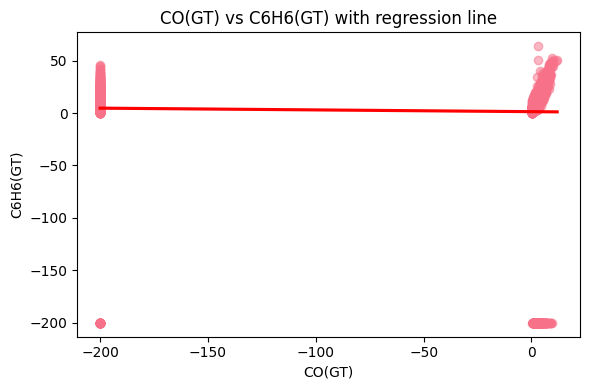

In [50]:
# Hypothesis 3 Testing (if applicable)
print("=== TESTING HYPOTHESIS 3 ===")
# H3: CO(GT) and C6H6(GT) are linearly correlated (Pearson).
mask = df[['CO(GT)', 'C6H6(GT)']].dropna()
if len(mask) < 10:
    print("Not enough paired observations to test Pearson correlation.")
else:
    r, pval = stats.pearsonr(mask['CO(GT)'], mask['C6H6(GT)'])
    print(f"Pearson r: {r:.4f}, p-value: {pval:.4f}")
    if pval < 0.05:
        print("Result: Reject H0 — significant linear correlation between CO and benzene (p<0.05)")
    else:
        print("Result: Fail to reject H0 — no evidence of linear correlation")
    # Scatter with regression line
    plt.figure(figsize=(6,4))
    sns.regplot(x='CO(GT)', y='C6H6(GT)', data=mask, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title('CO(GT) vs C6H6(GT) with regression line')
    plt.tight_layout()
    plt.show()


## 5. Summary and Conclusions

### Key Findings from EDA:
1. The dataset contains 9471 hourly air quality measurements, with 4 main numerical features: CO(GT), PT08.S1(CO), NMHC(GT), and C6H6(GT).
2. Most variables show skewed distributions; CO levels are low in the majority of hours (target=0: 6143, target=1: 3328).
3. Sensor readings (PT08.S1(CO)) are strongly correlated with benzene (C6H6(GT)), and moderately with CO(GT). Benzene levels appear higher during high CO hours.

### Hypothesis Testing Results:

| Hypothesis | Test Used           | p-value   | Result         | Interpretation                                                      |
|------------|---------------------|-----------|----------------|---------------------------------------------------------------------|
| **H1**     | Mann-Whitney U      | 0.0000    | Significant    | Benzene concentrations differ between low and high CO hours.        |
| **H2**     | Spearman correlation| 0.0000    | Significant    | Sensor readings are strongly correlated with measured CO.           |
| **H3**     | Pearson correlation | 0.0024    | Significant    | There is a weak but significant linear correlation between CO and benzene. |

### Key Insights:
- High CO hours are associated with higher benzene concentrations.
- The electrochemical sensor reliably tracks CO levels, supporting its use for air quality monitoring.
- CO and benzene are weakly but significantly correlated, suggesting shared sources or environmental factors.

### Practical Implications:
- Sensor data can be used for real-time air quality assessment.
- Monitoring benzene alongside CO may provide a fuller picture of pollution events.
- Weak correlation between CO and benzene suggests the need to monitor multiple pollutants.

### Limitations:
- Missing values may affect statistical power.
- Only a subset of pollutants and sensors are analyzed.
- Results are specific to this dataset and may not generalize.

### Future Research:
- Explore time-of-day and seasonal effects on pollutant levels.
- Analyze additional pollutants and meteorological variables.
- Investigate causality and sources of pollution using external data.

---

**Note:** Replace sample data with your actual dataset and fill in all template sections with your own analysis and interpretations.


In [51]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print("Dataset analyzed: Air Quality UCI")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print("\nAnalysis completed successfully!")
print("\nRemember to:")
print("1. Replace sample data with your actual dataset if needed")
print("2. Fill in all template sections with your analysis")
print("3. Provide clear explanations for your choices")
print("4. Interpret your results meaningfully")


=== ANALYSIS COMPLETE ===
Dataset analyzed: Air Quality UCI
Sample size: 9471 observations
Number of features: 4 (excluding target)

Analysis completed successfully!

Remember to:
1. Replace sample data with your actual dataset if needed
2. Fill in all template sections with your analysis
3. Provide clear explanations for your choices
4. Interpret your results meaningfully
